In [171]:
import numpy as np
import pandas as pd




In [172]:
!mkdir data/
!wget https://raw.githubusercontent.com/Nandiniii10/CL653-Project/main/final_data.csv

mkdir: cannot create directory ‘data/’: File exists
--2024-04-25 17:44:08--  https://raw.githubusercontent.com/Nandiniii10/CL653-Project/main/final_data.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 129789 (127K) [text/plain]
Saving to: ‘final_data.csv.1’

final_data.csv.1    100%[===================>] 126.75K  --.-KB/s    in 0.005s  

2024-04-25 17:44:08 (25.9 MB/s) - ‘final_data.csv.1’ saved [129789/129789]



In [174]:
nandini_df = pd.read_csv("final_data.csv")
nandini_df.head()
nandini_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Temperature (◦C)            1000 non-null   float64
 1   Pressure (bar)              1000 non-null   float64
 2   Dosage (g)                  1000 non-null   float64
 3   Initial sulfur (ppm)        1000 non-null   float64
 4   Sulfur concentration (ppm)  1000 non-null   float64
 5   Emission (%)                1000 non-null   float64
 6   HDS cost ($)                1000 non-null   float64
dtypes: float64(7)
memory usage: 54.8 KB


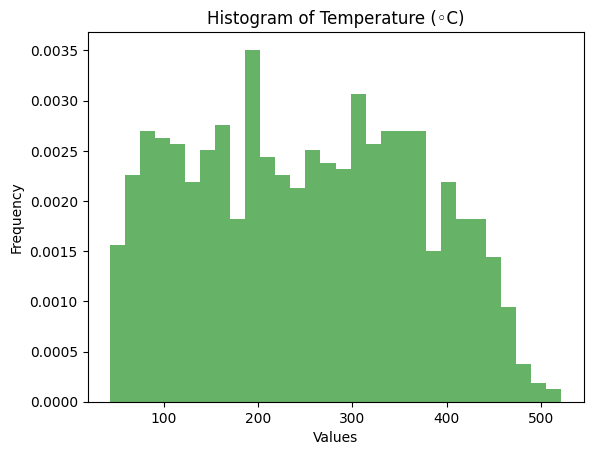

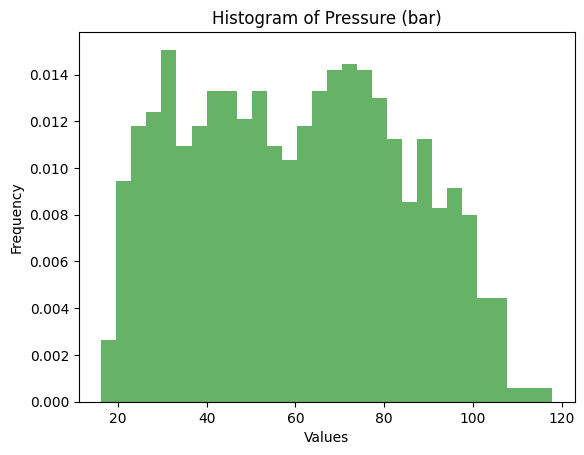

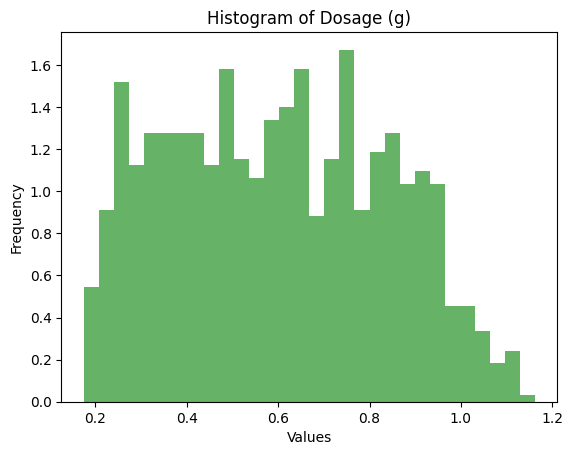

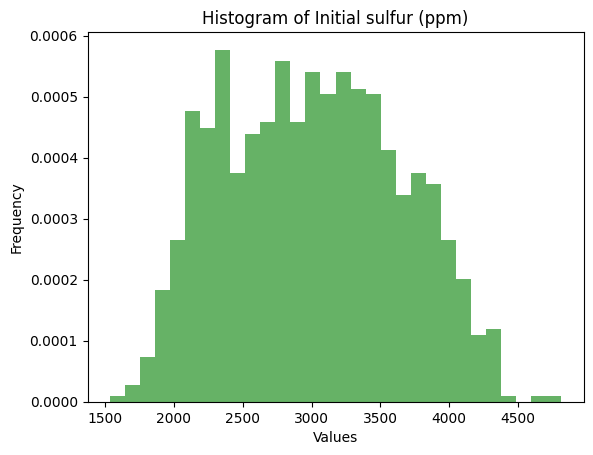

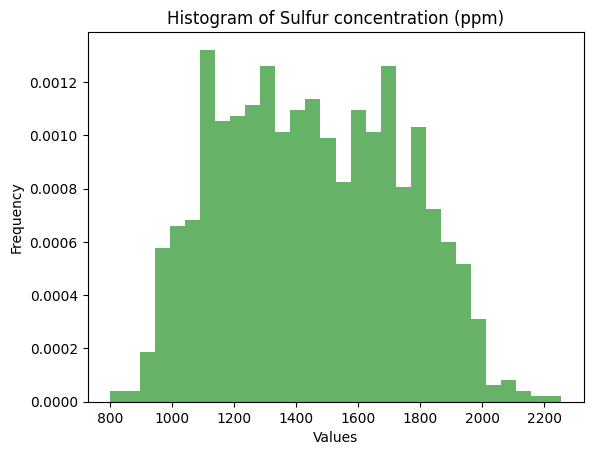

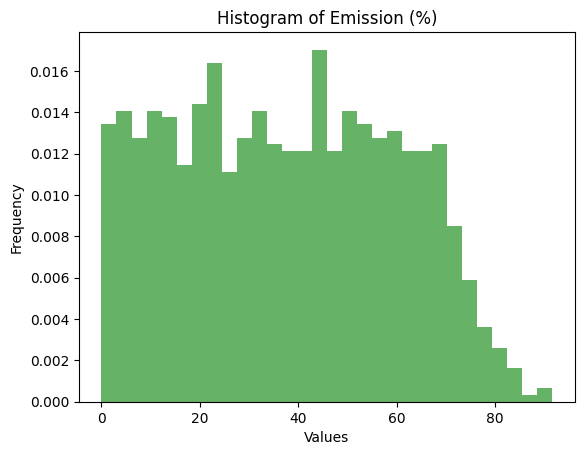

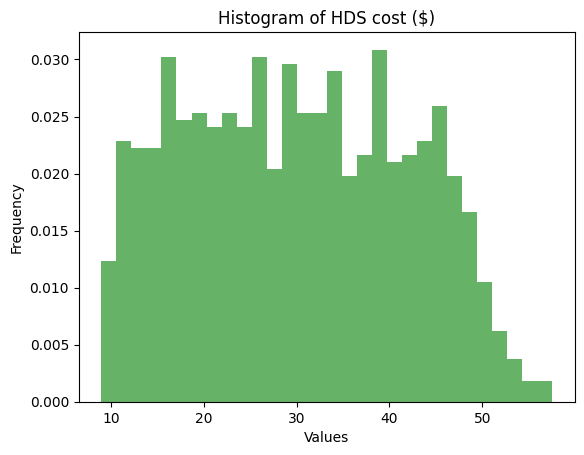

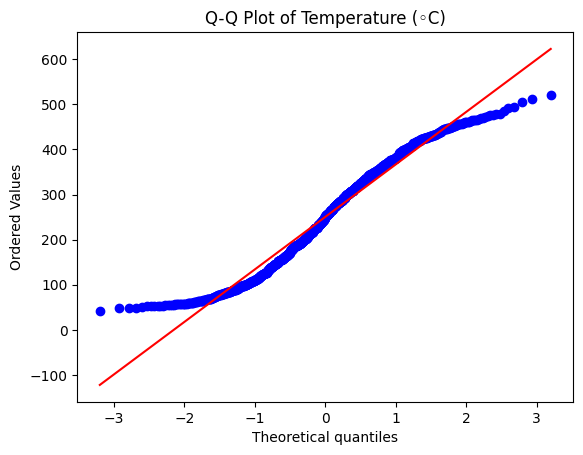

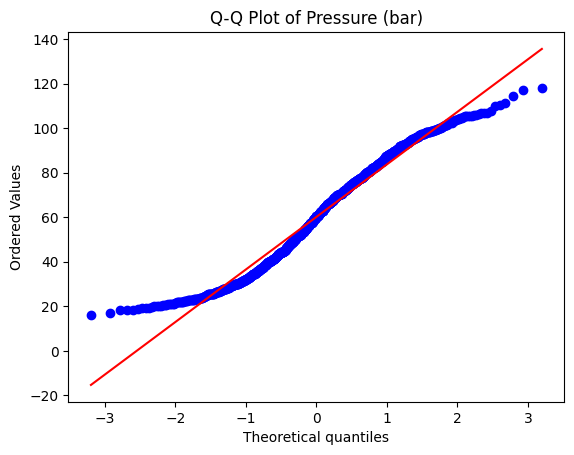

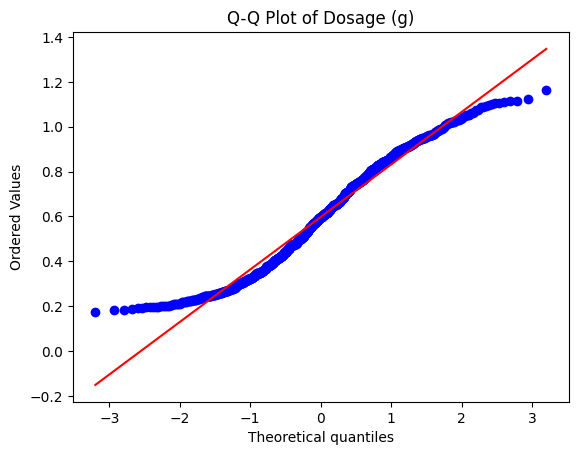

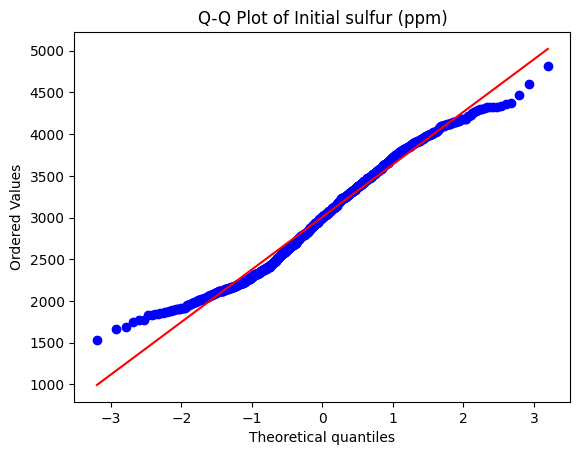

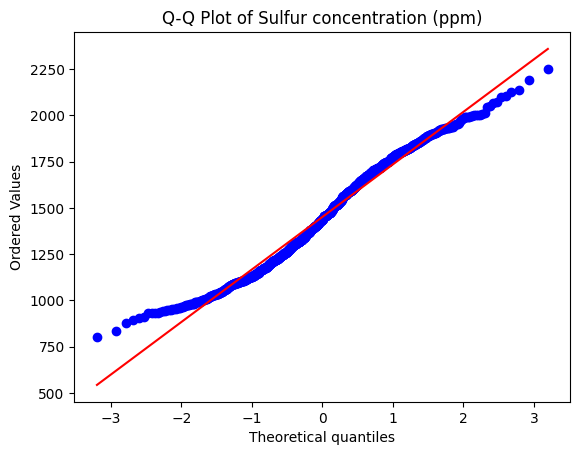

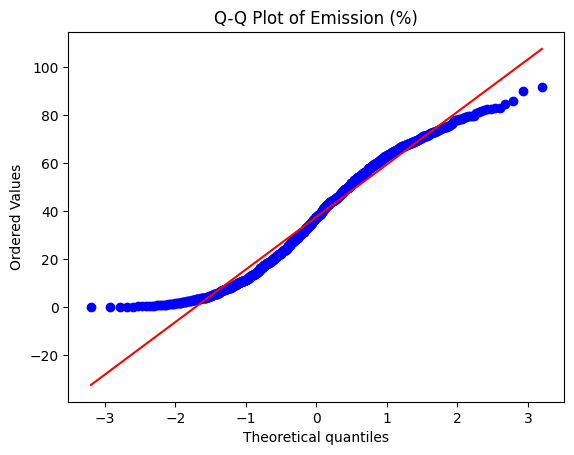

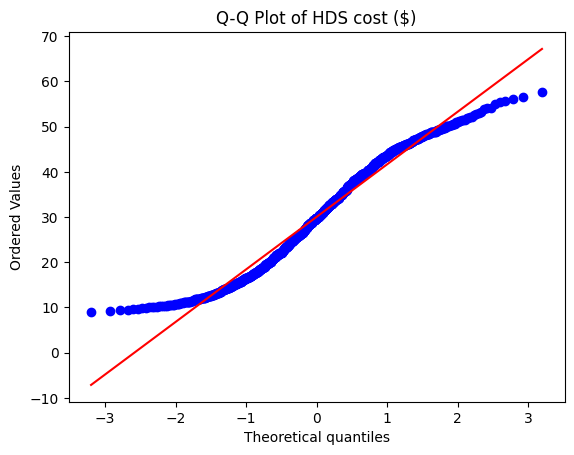

In [175]:
from scipy import stats
import matplotlib.pyplot as plt

# Visual check using histograms for each column
for column in nandini_df.columns:
    plt.hist(nandini_df[column], bins=30, density=True, alpha=0.6, color='g')
    plt.title(f'Histogram of {column}')
    plt.xlabel('Values')
    plt.ylabel('Frequency')
    plt.show()

# Q-Q plots for each column
for column in nandini_df.columns:
    stats.probplot(nandini_df[column], dist="norm", plot=plt)
    plt.title(f'Q-Q Plot of {column}')
    plt.xlabel('Theoretical quantiles')
    plt.ylabel('Ordered Values')
    plt.show()

In [176]:
# Check for null values
null_values = nandini_df.isnull().sum()

# Display the number of null values in each column
print("Number of null values in each column:")
print(null_values)

Number of null values in each column:
Temperature (◦C)              0
Pressure (bar)                0
Dosage (g)                    0
Initial sulfur (ppm)          0
Sulfur concentration (ppm)    0
Emission (%)                  0
HDS cost ($)                  0
dtype: int64


In [177]:
# Define a function to detect outliers using the IQR method
def detect_outliers(df):
    outliers = pd.DataFrame(columns=df.columns)
    for col in df.columns:
        if df[col].dtype != 'object':
            Q1 = df[col].quantile(0.25)
            Q3 = df[col].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
            col_outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
            outliers = pd.concat([outliers, col_outliers])
    return outliers

# Detect outliers in the dataset
outliers = detect_outliers(nandini_df)

# Display the outliers
print("Outliers in the dataset:")
print(outliers)

Outliers in the dataset:
Empty DataFrame
Columns: [Temperature (◦C), Pressure (bar), Dosage (g), Initial sulfur (ppm), Sulfur concentration (ppm), Emission (%), HDS cost ($)]
Index: []


In [178]:
#Removing the outliers
# Define a function to remove outliers using the IQR method
def remove_outliers(df):
    cleaned_df = df.copy()
    for col in df.columns:
        if df[col].dtype != 'object':
            Q1 = df[col].quantile(0.25)
            Q3 = df[col].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
            # Remove outliers
            cleaned_df = cleaned_df[(cleaned_df[col] >= lower_bound) & (cleaned_df[col] <= upper_bound)]
    return cleaned_df

# Remove outliers from the dataset
cleaned_df = remove_outliers(nandini_df)

# Display the cleaned DataFrame
print("DataFrame after removing outliers:")
print(cleaned_df)



DataFrame after removing outliers:
     Temperature (◦C)  Pressure (bar)  Dosage (g)  Initial sulfur (ppm)  \
0           52.973813       19.653878    0.182447           1864.812898   
1           56.533860       19.287161    0.197578           1904.865303   
2           47.928090       21.899594    0.195154           2113.968780   
3           58.380747       18.244508    0.220211           1965.284914   
4           42.588162       21.663539    0.194439           2444.374994   
..                ...             ...         ...                   ...   
995        464.322212      111.172016    0.957321           4145.441206   
996        476.607778      104.816344    1.036527           3962.946460   
997        452.821679      114.407451    1.105694           3804.973231   
998        407.300012      104.539405    1.073203           4302.309384   
999        408.165408       89.666832    1.049700           4463.107505   

     Sulfur concentration (ppm)  Emission (%)  HDS cost ($)  
0 

In [179]:
# Assign the cleaned DataFrame back to the variable nandini_df
nandini_df = cleaned_df
nandini_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Temperature (◦C)            1000 non-null   float64
 1   Pressure (bar)              1000 non-null   float64
 2   Dosage (g)                  1000 non-null   float64
 3   Initial sulfur (ppm)        1000 non-null   float64
 4   Sulfur concentration (ppm)  1000 non-null   float64
 5   Emission (%)                1000 non-null   float64
 6   HDS cost ($)                1000 non-null   float64
dtypes: float64(7)
memory usage: 54.8 KB


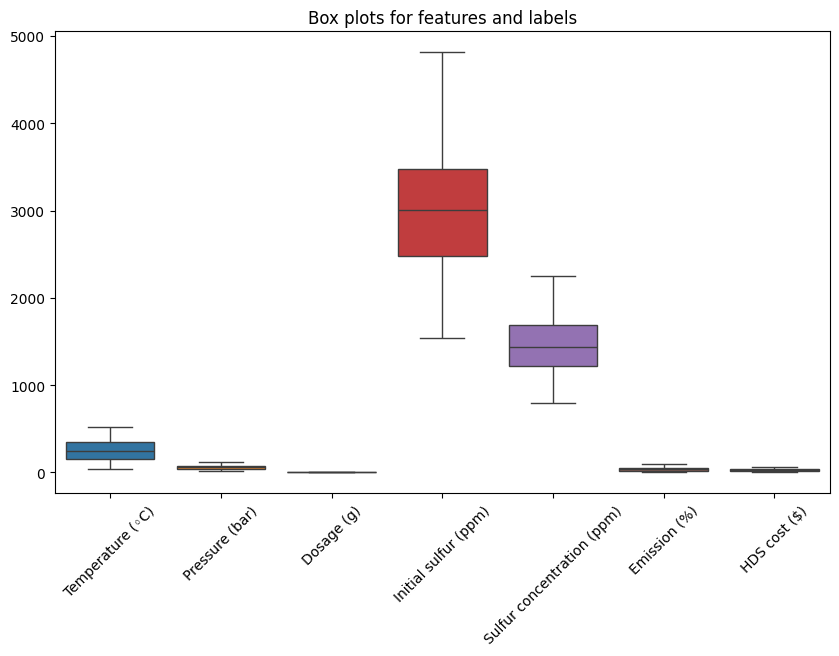

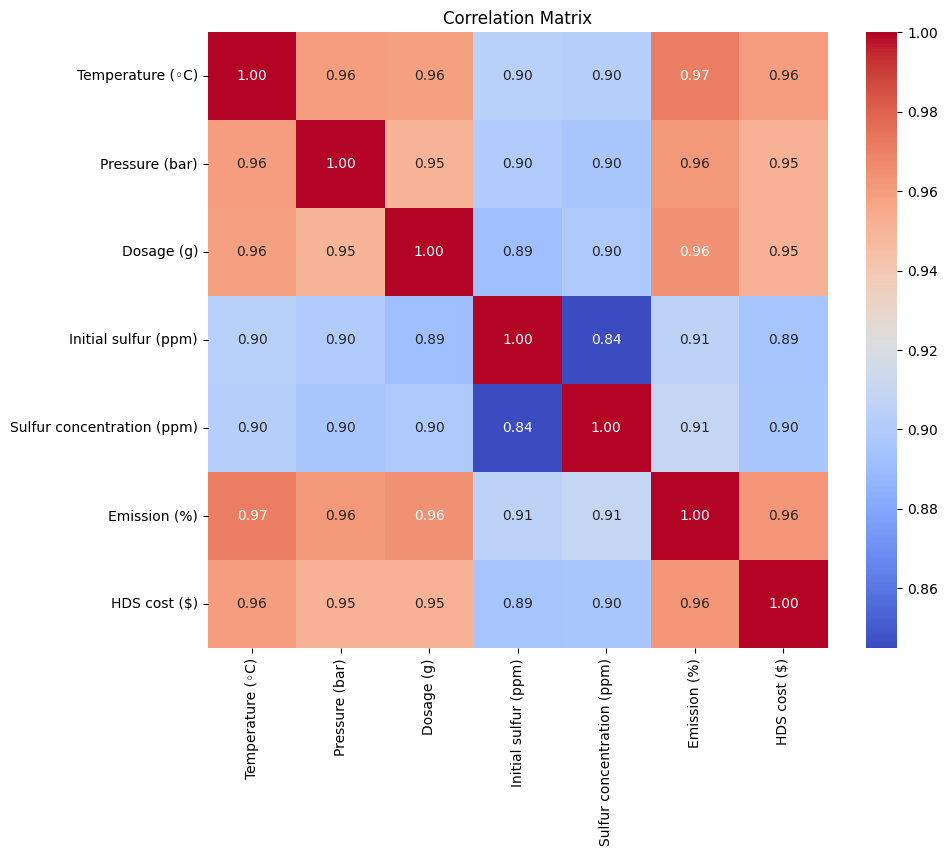

In [180]:
import seaborn as sns
# Box plots
plt.figure(figsize=(10, 6))
sns.boxplot(data=nandini_df)
plt.title("Box plots for features and labels")
plt.xticks(rotation=45)
plt.show()


# Correlation matrix
plt.figure(figsize=(10, 8))
corr_matrix = nandini_df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

In [181]:
from sklearn.preprocessing import StandardScaler


# Extract the feature variables
features = ['Temperature (◦C)', 'Pressure (bar)', 'Dosage (g)', 'Initial sulfur (ppm)']
X = nandini_df[features]

# Extract the label variables
labels = ['Sulfur concentration (ppm)', 'Emission (%)', 'HDS cost ($)']
y = nandini_df[labels]

# Initialize the scaler
scaler = StandardScaler()

# Fit the scaler to your data and transform both features and labels
nandini_df_scaled = nandini_df.copy()  # Create a copy of the original DataFrame
nandini_df_scaled[features] = scaler.fit_transform(X)
nandini_df_scaled[labels] = scaler.fit_transform(y)

# Now nandini_df_scaled contains the scaled features and labels

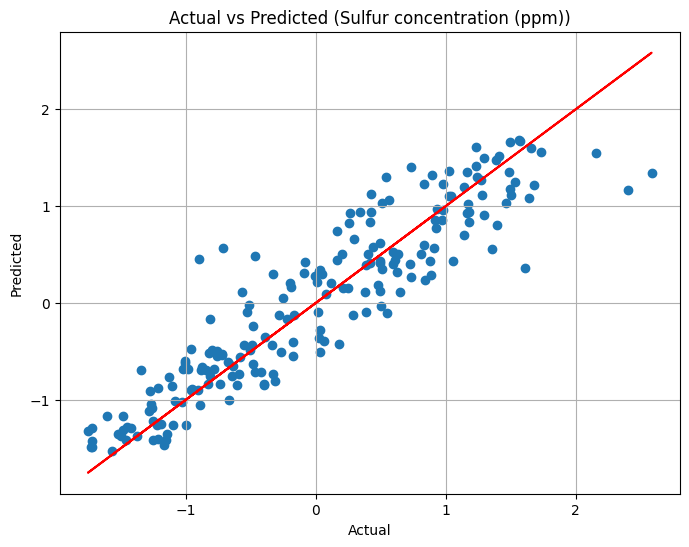

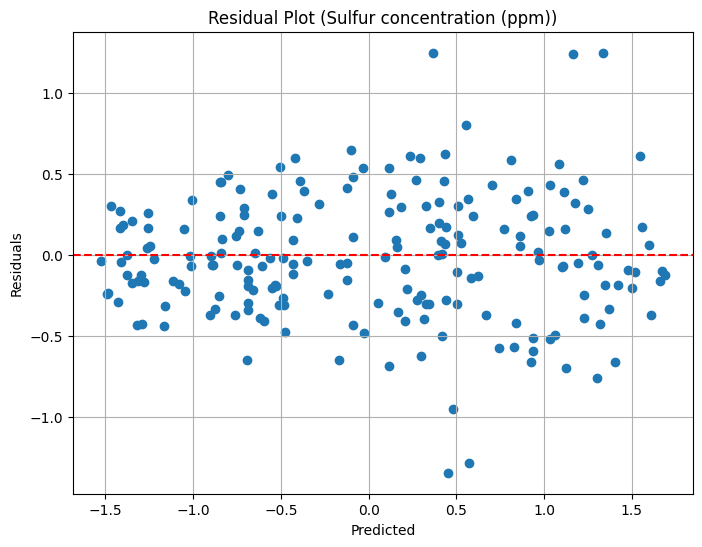

Sulfur concentration (ppm) = 0.00 + 0.26 * Temperature (◦C) + 0.27 * Pressure (bar) + 0.31 * Dosage (g) + 0.09 * Initial sulfur (ppm)



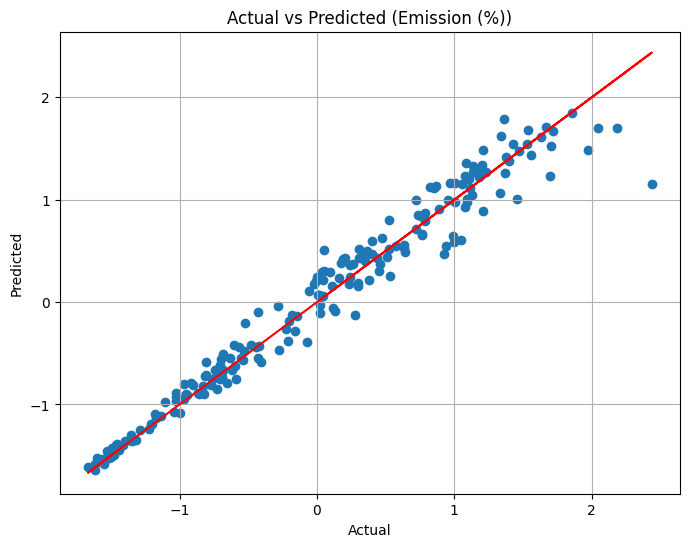

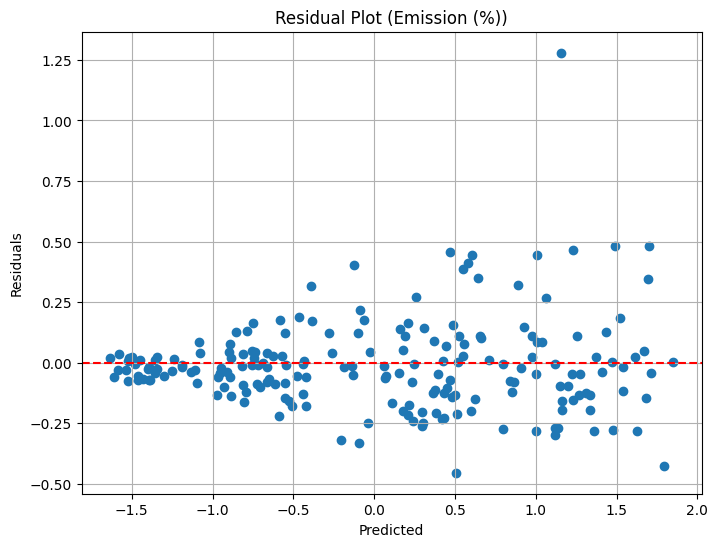

Emission (%) = 0.00 + 0.41 * Temperature (◦C) + 0.22 * Pressure (bar) + 0.30 * Dosage (g) + 0.07 * Initial sulfur (ppm)



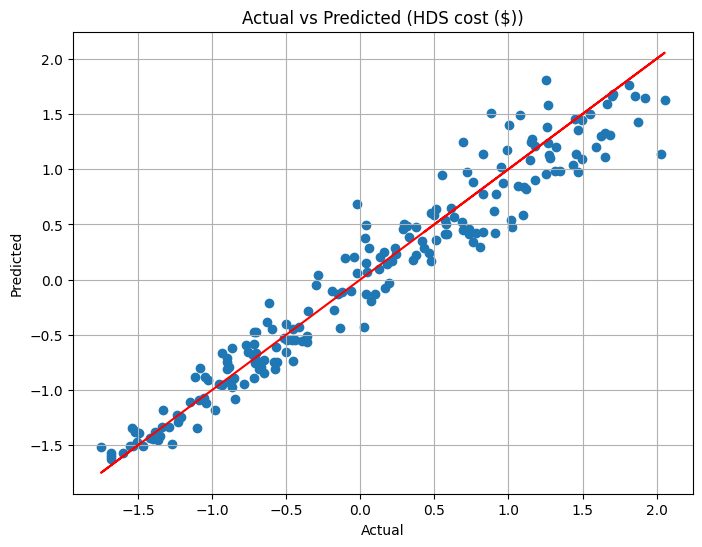

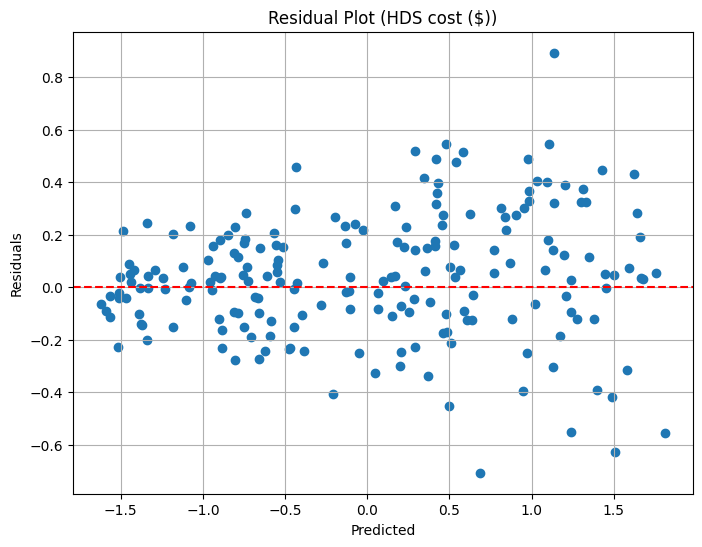

HDS cost ($) = -0.01 + 0.39 * Temperature (◦C) + 0.23 * Pressure (bar) + 0.29 * Dosage (g) + 0.07 * Initial sulfur (ppm)

Metrics for Sulfur concentration (ppm):
R^2: 0.8433
RMSE: 0.3889
MAE: 0.3004


Metrics for Emission (%):
R^2: 0.9629
RMSE: 0.1906
MAE: 0.1290


Metrics for HDS cost ($):
R^2: 0.9428
RMSE: 0.2395
MAE: 0.1833


Equation for Sulfur concentration (ppm):
Sulfur concentration (ppm) = 0.00 + 0.26 * Temperature (◦C) + 0.27 * Pressure (bar) + 0.31 * Dosage (g) + 0.09 * Initial sulfur (ppm)

Equation for Emission (%):
Emission (%) = 0.00 + 0.41 * Temperature (◦C) + 0.22 * Pressure (bar) + 0.30 * Dosage (g) + 0.07 * Initial sulfur (ppm)

Equation for HDS cost ($):
HDS cost ($) = -0.01 + 0.39 * Temperature (◦C) + 0.23 * Pressure (bar) + 0.29 * Dosage (g) + 0.07 * Initial sulfur (ppm)



In [182]:
#MULTILINEAR REGRESSION MODEL
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt
import numpy as np

# Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(nandini_df_scaled[features], nandini_df_scaled[labels], test_size=0.2, random_state=42)

# Initialize an empty dictionary to store model performance metrics
performance_metrics = {}

# Initialize an empty dictionary to store model coefficients
model_equations = {}

# Loop through each label
for label in labels:
    # Initialize linear regression model
    model = LinearRegression()

    # Train the model
    model.fit(X_train, y_train[label])

    # Predict on the test set
    y_pred = model.predict(X_test)

    # Calculate R^2 score
    r2 = r2_score(y_test[label], y_pred)

    # Calculate RMSE
    rmse = np.sqrt(mean_squared_error(y_test[label], y_pred))

    # Calculate MAE
    mae = mean_absolute_error(y_test[label], y_pred)

    # Store performance metrics
    performance_metrics[label] = {'R^2': r2, 'RMSE': rmse, 'MAE': mae}

    # Store model equation (coefficients)
    model_equations[label] = {'Coefficients': model.coef_, 'Intercept': model.intercept_}

    # Plot actual vs predicted values
    plt.figure(figsize=(8, 6))
    plt.scatter(y_test[label], y_pred)
    plt.plot(y_test[label], y_test[label], color='red')  # Line representing perfect predictions
    plt.title(f'Actual vs Predicted ({label})')
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.grid(True)
    plt.show()

    # Plot residual plot
    plt.figure(figsize=(8, 6))
    plt.scatter(y_pred, y_test[label] - y_pred)
    plt.title(f'Residual Plot ({label})')
    plt.xlabel('Predicted')
    plt.ylabel('Residuals')
    plt.axhline(y=0, color='red', linestyle='--')  # Line at y=0
    plt.grid(True)
    plt.show()

    # Print the equation of the model
    coefficients = model.coef_
    intercept = model.intercept_
    print(f'{label} = {intercept:.2f}', end='')
    for i in range(len(features)):
        print(f' + {coefficients[i]:.2f} * {features[i]}', end='')
    print('\n')

# Print performance metrics
for label, metrics in performance_metrics.items():
    print(f'Metrics for {label}:')
    for metric, value in metrics.items():
        print(f'{metric}: {value:.4f}')
    print('\n')

# Print model equations
for label, equation in model_equations.items():
    print(f'Equation for {label}:')
    coefficients = equation['Coefficients']
    intercept = equation['Intercept']
    print(f'{label} = {intercept:.2f}', end='')
    for i in range(len(features)):
        print(f' + {coefficients[i]:.2f} * {features[i]}', end='')
    print('\n')

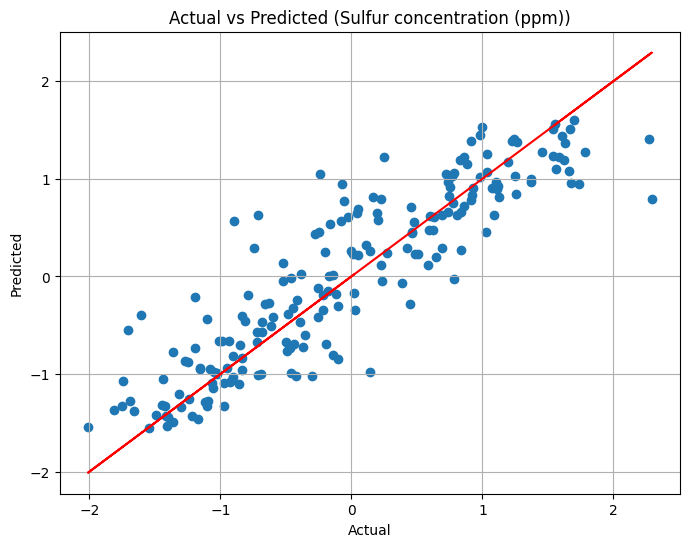

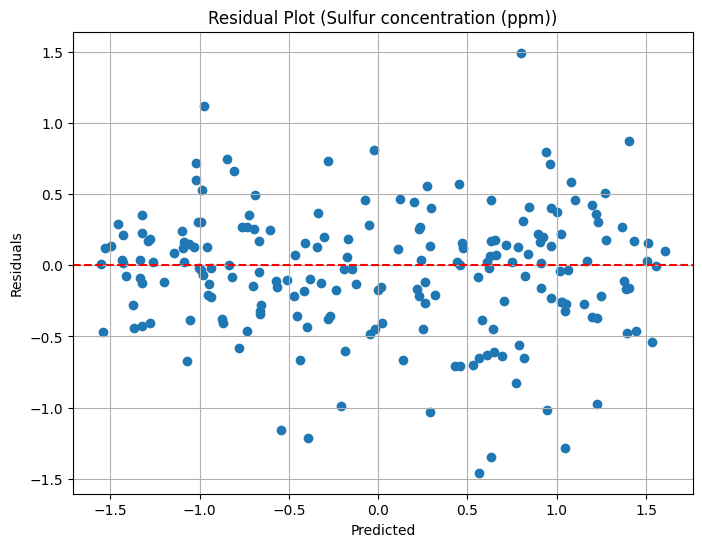

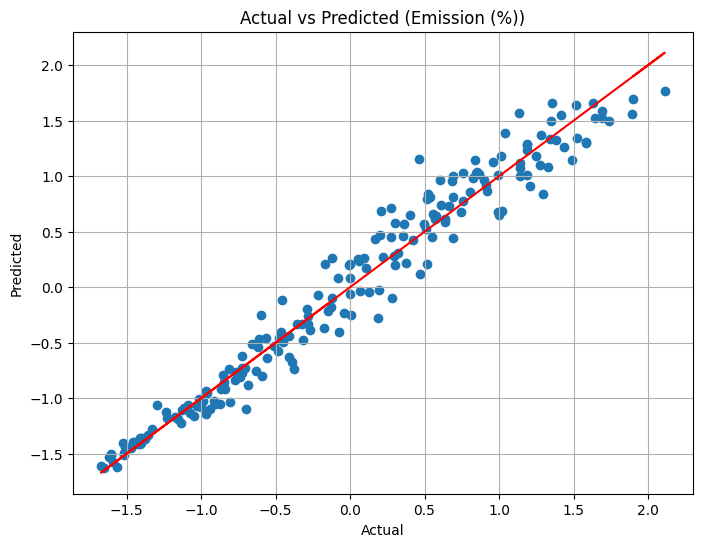

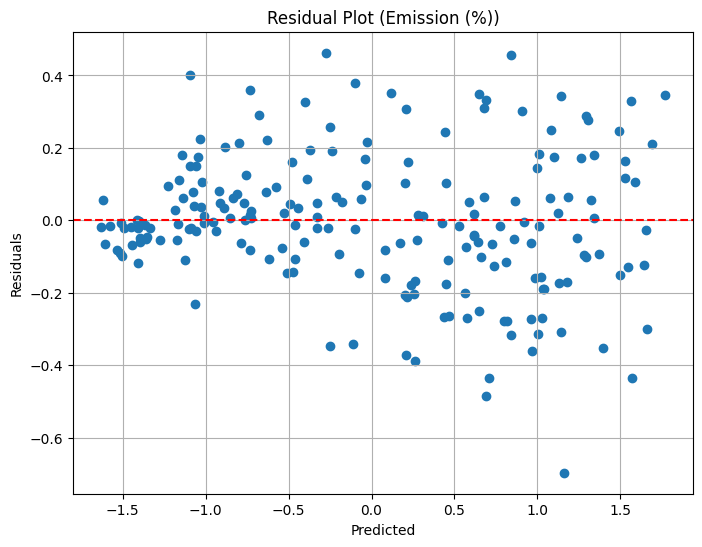

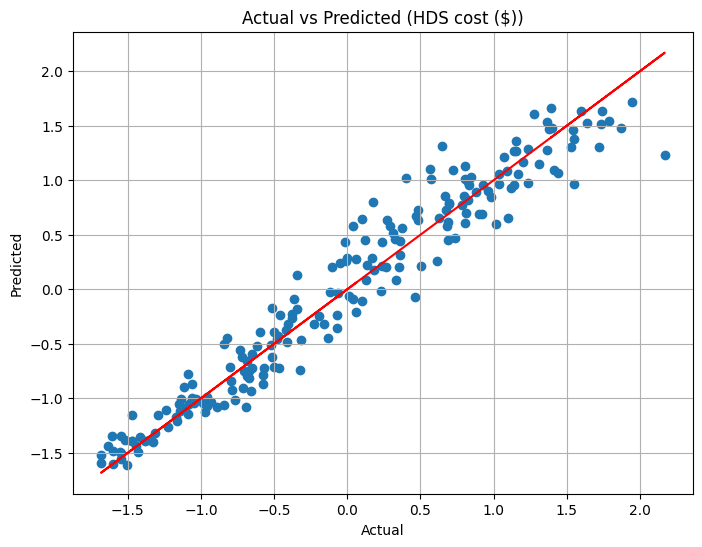

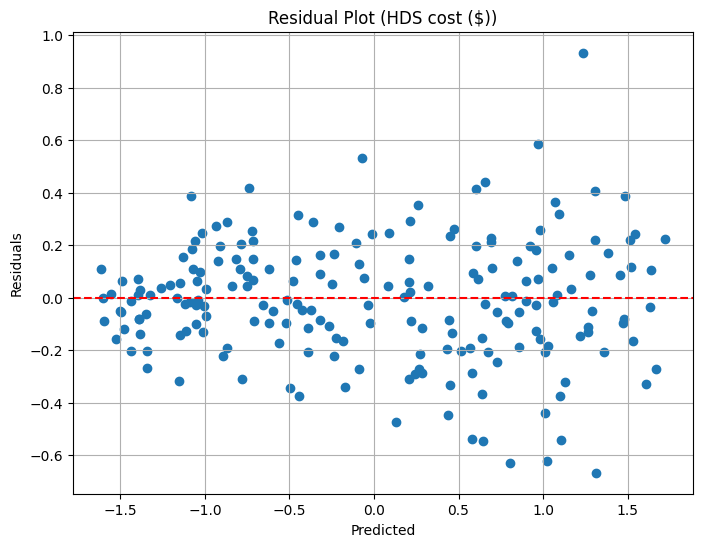

Metrics for Sulfur concentration (ppm):
R^2: 0.7957
RMSE: 0.4439
MAE: 0.3320


Metrics for Emission (%):
R^2: 0.9617
RMSE: 0.1883
MAE: 0.1416


Metrics for HDS cost ($):
R^2: 0.9432
RMSE: 0.2313
MAE: 0.1773




In [ ]:
#MULTI-LAYER PERCEPTRON MODEL(Without hyperparameter tuning)
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt
import numpy as np

# Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(nandini_df_scaled[features], nandini_df_scaled[labels], test_size=0.2, random_state=55)

# Initialize an empty dictionary to store model performance metrics
performance_metrics_mlp = {}

# Initialize an empty dictionary to store model coefficients
model_equations_mlp = {}

# Loop through each label
for label in labels:
    # Initialize MLP regressor model
    model = MLPRegressor(random_state=42)

    # Train the model
    model.fit(X_train, y_train[label])

    # Predict on the test set
    y_pred = model.predict(X_test)

    # Calculate R^2 score
    r2 = r2_score(y_test[label], y_pred)

    # Calculate RMSE
    rmse = np.sqrt(mean_squared_error(y_test[label], y_pred))

    # Calculate MAE
    mae = mean_absolute_error(y_test[label], y_pred)

    # Store performance metrics
    performance_metrics_mlp[label] = {'R^2': r2, 'RMSE': rmse, 'MAE': mae}

    # Store model coefficients (not applicable for MLP)
    model_equations_mlp[label] = None

    # Plot actual vs predicted values
    plt.figure(figsize=(8, 6))
    plt.scatter(y_test[label], y_pred)
    plt.plot(y_test[label], y_test[label], color='red')  # Line representing perfect predictions
    plt.title(f'Actual vs Predicted ({label})')
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.grid(True)
    plt.show()

    # Plot residual plot
    plt.figure(figsize=(8, 6))
    plt.scatter(y_pred, y_test[label] - y_pred)
    plt.title(f'Residual Plot ({label})')
    plt.xlabel('Predicted')
    plt.ylabel('Residuals')
    plt.axhline(y=0, color='red', linestyle='--')  # Line at y=0
    plt.grid(True)
    plt.show()

# Print performance metrics
for label, metrics in performance_metrics_mlp.items():
    print(f'Metrics for {label}:')
    for metric, value in metrics.items():
        print(f'{metric}: {value:.4f}')
    print('\n')

Fitting 5 folds for each of 48 candidates, totalling 240 fits


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptro

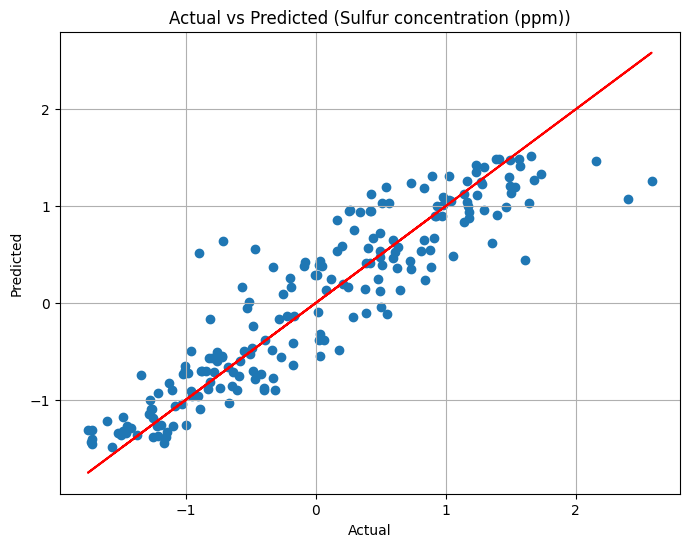

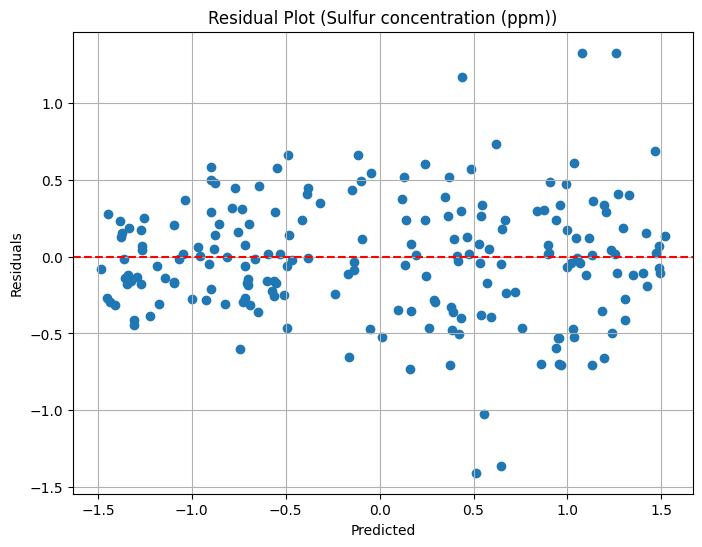

Fitting 5 folds for each of 48 candidates, totalling 240 fits


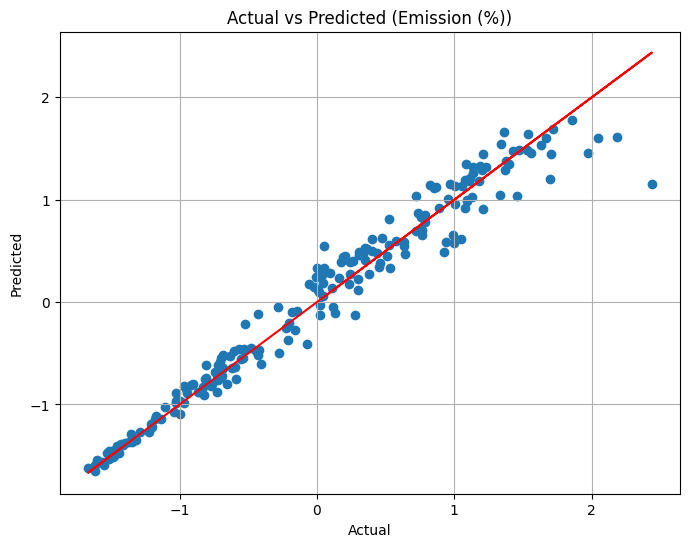

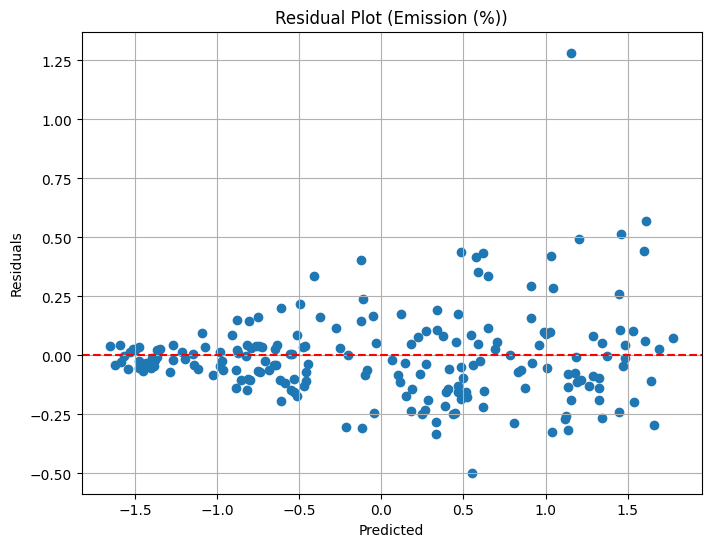

Fitting 5 folds for each of 48 candidates, totalling 240 fits


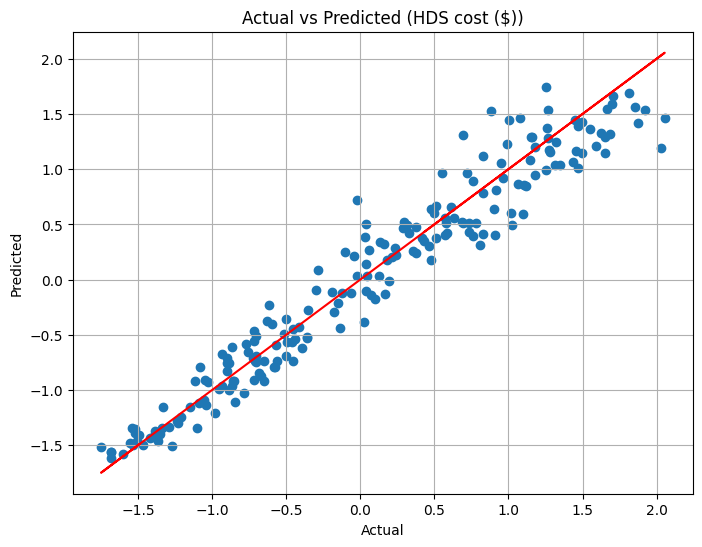

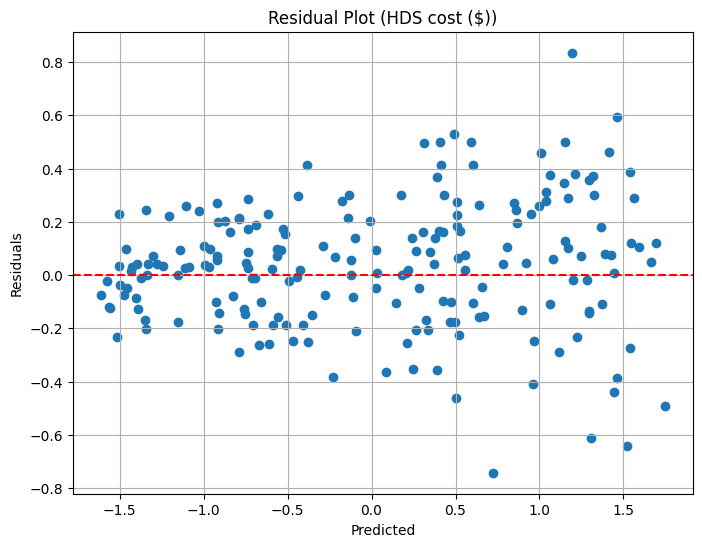

Metrics for Sulfur concentration (ppm):
R^2: 0.8388
RMSE: 0.3944
MAE: 0.2979


Metrics for Emission (%):
R^2: 0.9622
RMSE: 0.1924
MAE: 0.1303


Metrics for HDS cost ($):
R^2: 0.9427
RMSE: 0.2396
MAE: 0.1861




In [ ]:
#MULTI-LAYER PERCEPTRON MODEL(With hyperparameter tuning)
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# Define features and labels
features = ['Temperature (◦C)', 'Pressure (bar)', 'Dosage (g)', 'Initial sulfur (ppm)']
labels = ['Sulfur concentration (ppm)', 'Emission (%)', 'HDS cost ($)']

# Define the pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Standardize features by removing the mean and scaling to unit variance
    ('mlp', MLPRegressor(random_state=42))  # Multi-layer Perceptron regressor
])

# Define the hyperparameters grid for tuning
param_grid = {
    'mlp__hidden_layer_sizes': [(50,), (100,), (50, 50), (100, 50)],
    'mlp__activation': ['relu', 'tanh'],
    'mlp__alpha': [0.0001, 0.001, 0.01],
    'mlp__learning_rate': ['constant', 'adaptive'],
}

# Initialize GridSearchCV
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='neg_mean_squared_error', verbose=1)

# Initialize an empty dictionary to store model performance metrics
performance_metrics_mlp_hyper = {}

# Initialize an empty dictionary to store model coefficients
model_equations_mlp_hyper = {}

# Loop through each label
for label in labels:
    # Fit the GridSearchCV object to the training data for the current label
    grid_search.fit(X_train, y_train[label])

    # Get the best model from the grid search for the current label
    best_model = grid_search.best_estimator_

    # Predict on the test set for the current label
    y_pred = best_model.predict(X_test)

    # Calculate R^2 score for the current label
    r2 = r2_score(y_test[label], y_pred)

    # Calculate RMSE for the current label
    rmse = np.sqrt(mean_squared_error(y_test[label], y_pred))

    # Calculate MAE for the current label
    mae = mean_absolute_error(y_test[label], y_pred)

    # Store performance metrics for the current label
    performance_metrics_mlp_hyper[label] = {'R^2': r2, 'RMSE': rmse, 'MAE': mae}

    # Store model coefficients (not applicable for MLP)
    model_equations_mlp_hyper[label] = None

    # Plot actual vs predicted values for the current label
    plt.figure(figsize=(8, 6))
    plt.scatter(y_test[label], y_pred)
    plt.plot(y_test[label], y_test[label], color='red')  # Line representing perfect predictions
    plt.title(f'Actual vs Predicted ({label})')
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.grid(True)
    plt.show()

    # Plot residual plot for the current label
    plt.figure(figsize=(8, 6))
    plt.scatter(y_pred, y_test[label] - y_pred)
    plt.title(f'Residual Plot ({label})')
    plt.xlabel('Predicted')
    plt.ylabel('Residuals')
    plt.axhline(y=0, color='red', linestyle='--')  # Line at y=0
    plt.grid(True)
    plt.show()

# Print performance metrics for each label
for label, metrics in performance_metrics_mlp_hyper.items():
    print(f'Metrics for {label}:')
    for metric, value in metrics.items():
        print(f'{metric}: {value:.4f}')
    print('\n')


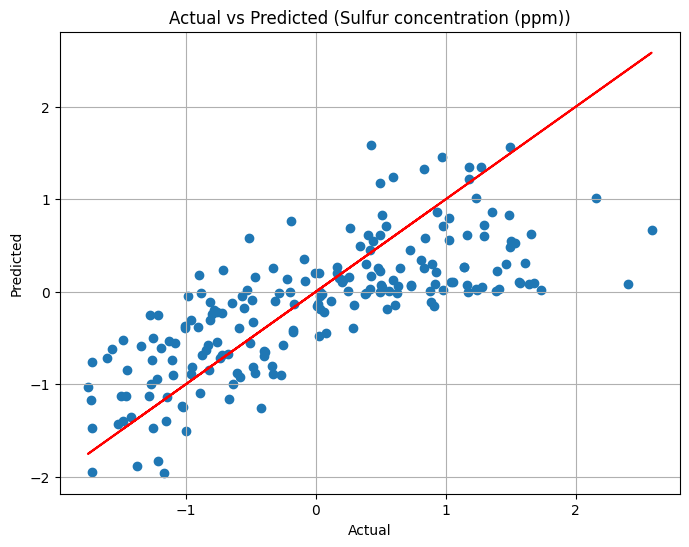

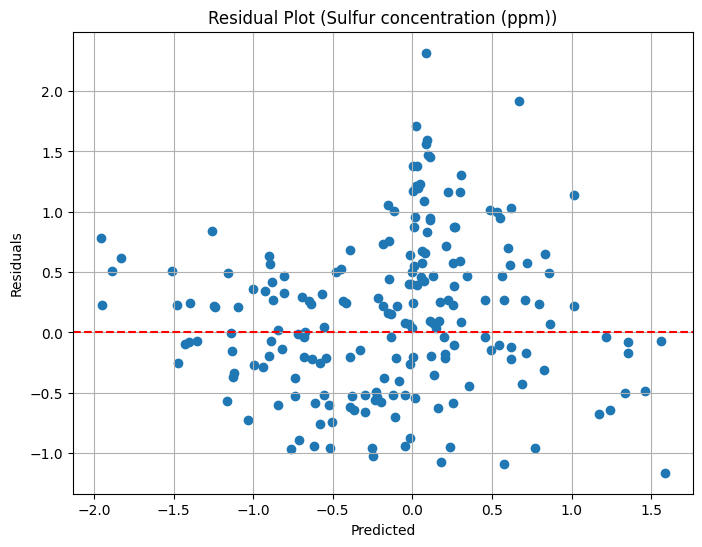

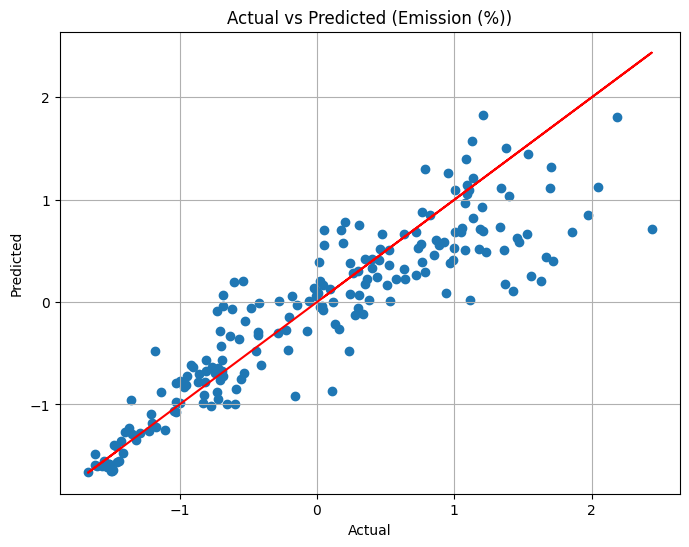

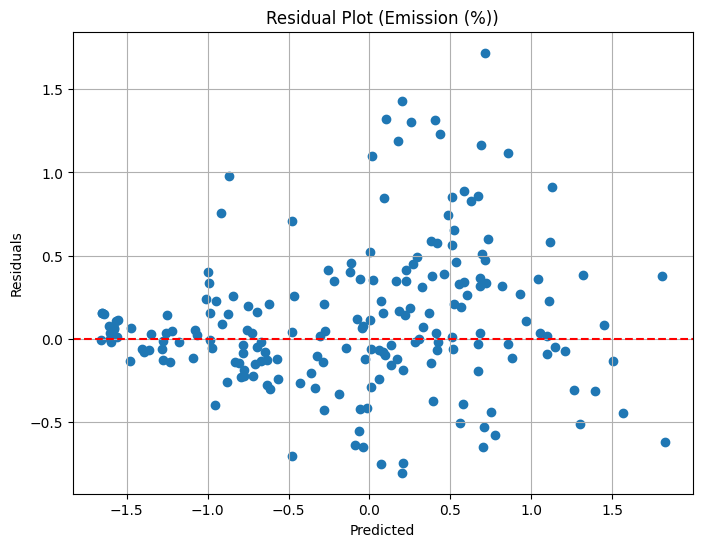

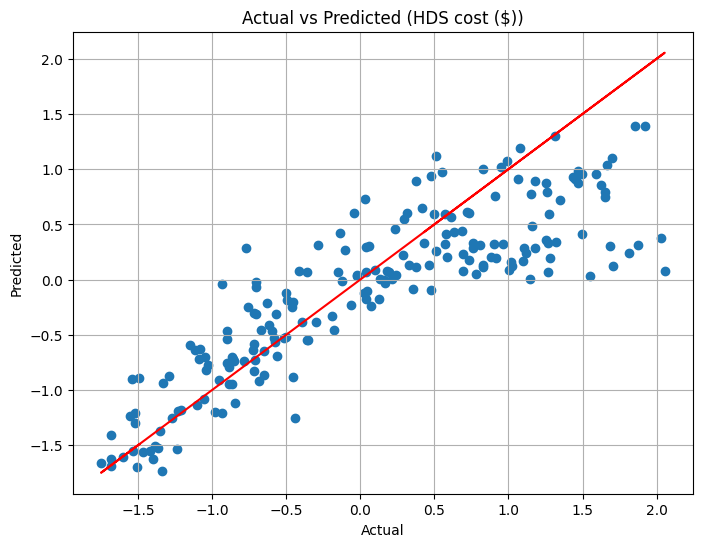

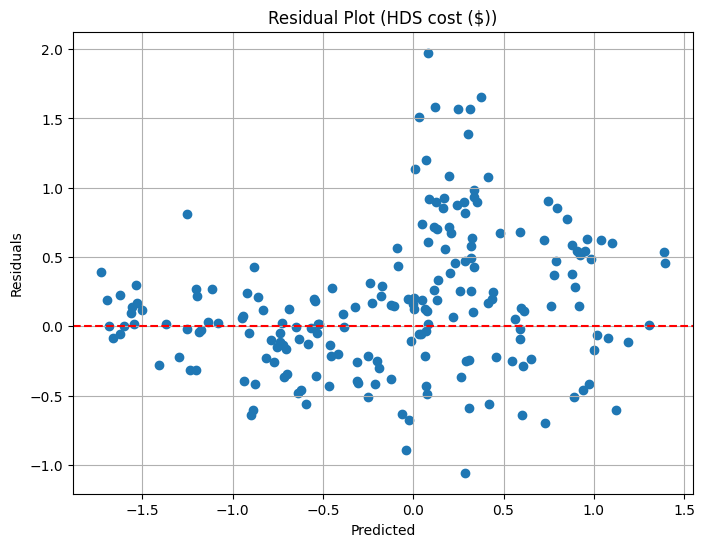

Metrics for Sulfur concentration (ppm):
R^2: 0.5380
RMSE: 0.6677
MAE: 0.5303


Metrics for Emission (%):
R^2: 0.7953
RMSE: 0.4475
MAE: 0.3139


Metrics for HDS cost ($):
R^2: 0.7114
RMSE: 0.5377
MAE: 0.3988




In [ ]:
#GAUSSIAN PROCESS REGRESSION(WITHOUT HYPERPARAMETER TUNING)
from sklearn.model_selection import train_test_split
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt
import numpy as np

# Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(nandini_df_scaled[features], nandini_df_scaled[labels], test_size=0.2, random_state=42)

# Initialize an empty dictionary to store model performance metrics
performance_metrics_gpr = {}

# Loop through each label
for label in labels:
    # Define the Gaussian Process model with RBF kernel
    kernel = C(1.0, (1e-3, 1e3)) * RBF(length_scale=1.0, length_scale_bounds=(1e-2, 1e2))
    model = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=10, random_state=42)

    # Train the model
    model.fit(X_train, y_train[label])

    # Predict on the test set
    y_pred = model.predict(X_test)

    # Calculate R^2 score
    r2 = r2_score(y_test[label], y_pred)

    # Calculate RMSE
    rmse = np.sqrt(mean_squared_error(y_test[label], y_pred))

    # Calculate MAE
    mae = mean_absolute_error(y_test[label], y_pred)

    # Store performance metrics
    performance_metrics_gpr[label] = {'R^2': r2, 'RMSE': rmse, 'MAE': mae}

    # Plot actual vs predicted values
    plt.figure(figsize=(8, 6))
    plt.scatter(y_test[label], y_pred)
    plt.plot(y_test[label], y_test[label], color='red')  # Line representing perfect predictions
    plt.title(f'Actual vs Predicted ({label})')
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.grid(True)
    plt.show()

    # Plot residual plot
    residuals = y_test[label] - y_pred
    plt.figure(figsize=(8, 6))
    plt.scatter(y_pred, residuals)
    plt.title(f'Residual Plot ({label})')
    plt.xlabel('Predicted')
    plt.ylabel('Residuals')
    plt.axhline(y=0, color='red', linestyle='--')  # Line at y=0
    plt.grid(True)
    plt.show()

# Print performance metrics
for label, metrics in performance_metrics_gpr.items():
    print(f'Metrics for {label}:')
    for metric, value in metrics.items():
        print(f'{metric}: {value:.4f}')
    print('\n')

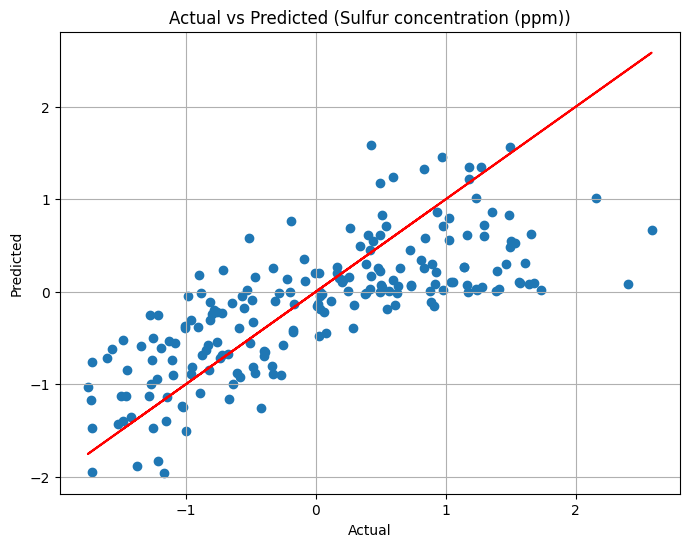

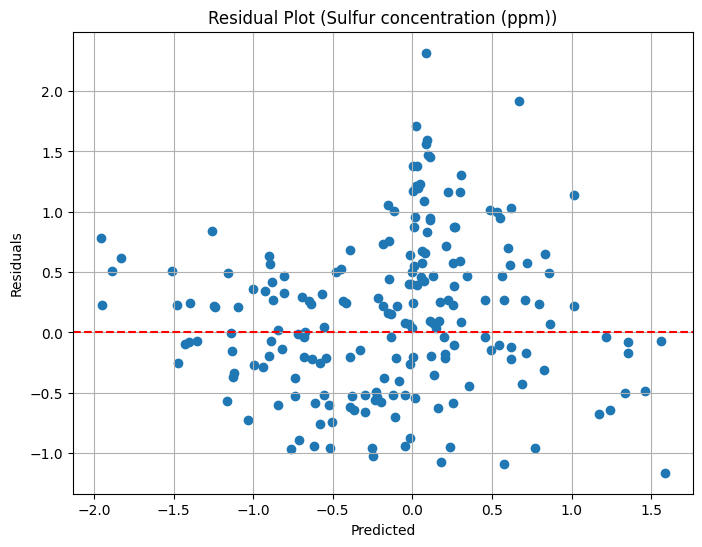

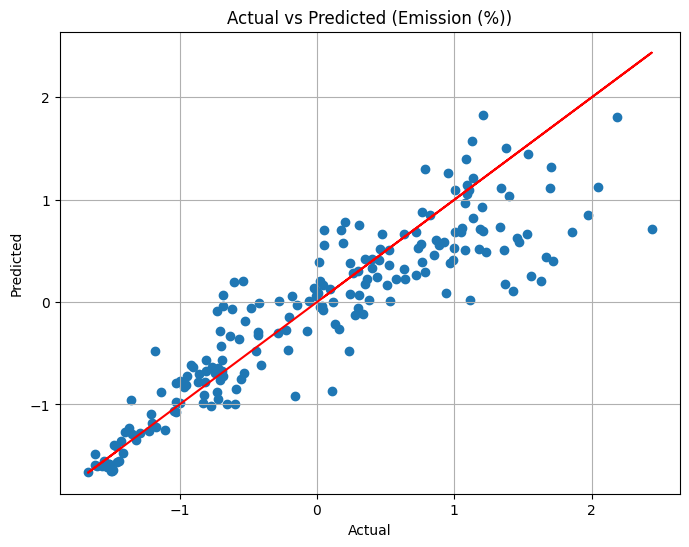

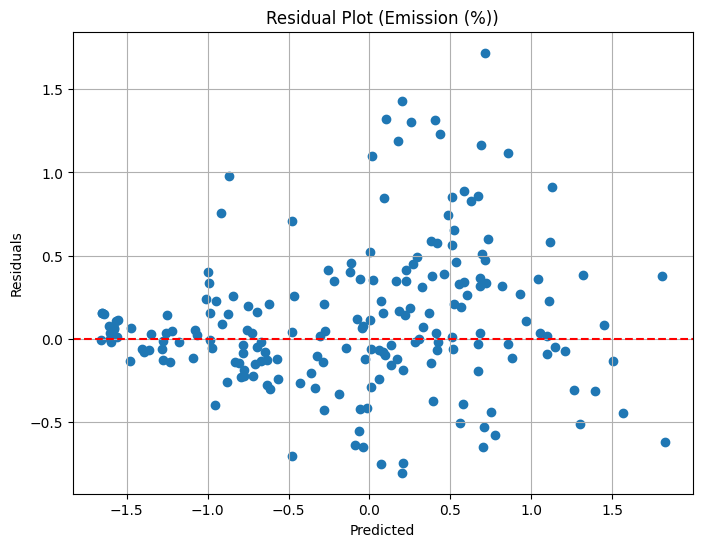

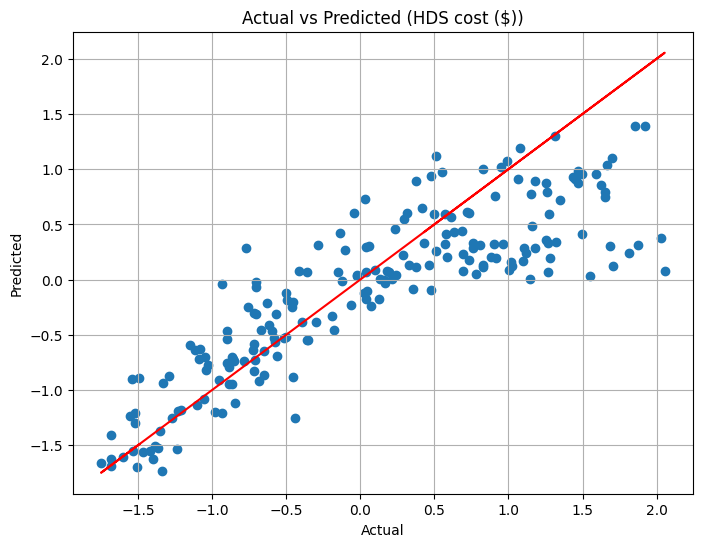

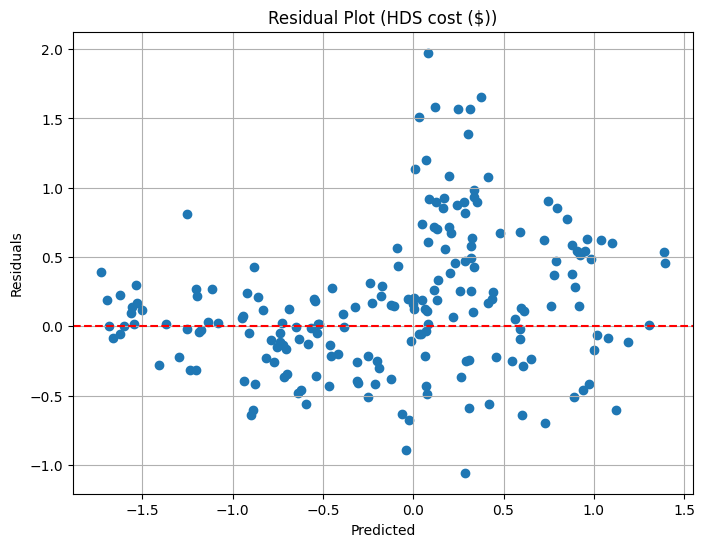

Metrics for Sulfur concentration (ppm):
R^2: 0.5380
RMSE: 0.6677
MAE: 0.5303


Metrics for Emission (%):
R^2: 0.7953
RMSE: 0.4475
MAE: 0.3139


Metrics for HDS cost ($):
R^2: 0.7114
RMSE: 0.5377
MAE: 0.3988




In [184]:
#GAUSSIAN PROCESS REGRESSION(WITH HYPERPARAMETER TUNING)
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, roc_curve, auc
import matplotlib.pyplot as plt
import numpy as np

# Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(nandini_df_scaled[features], nandini_df_scaled[labels], test_size=0.2, random_state=42)

# Initialize an empty dictionary to store model performance metrics
performance_metrics_gpr = {}

# Loop through each label
for label in labels:
    # Define the Gaussian Process model
    kernel = C(1.0, (1e-3, 1e3)) * RBF(length_scale=1.0, length_scale_bounds=(1e-2, 1e2))
    model = GaussianProcessRegressor(kernel=kernel, random_state=42)

    # Define hyperparameters for grid search
    param_grid = {
        "kernel": [C(1.0, (1e-3, 1e3)) * RBF(length_scale=1.0, length_scale_bounds=(1e-2, 1e2)),
                   C(1.0, (1e-3, 1e3)) * RBF(length_scale=0.5, length_scale_bounds=(1e-2, 1e2))]
    }

    # Perform grid search
    grid_search = GridSearchCV(model, param_grid, cv=5, scoring='r2')
    grid_search.fit(X_train, y_train[label])

    # Get best estimator
    best_model = grid_search.best_estimator_

    # Predict on the test set
    y_pred = best_model.predict(X_test)

    # Calculate R^2 score
    r2 = r2_score(y_test[label], y_pred)

    # Calculate RMSE
    rmse = np.sqrt(mean_squared_error(y_test[label], y_pred))

    # Calculate MAE
    mae = mean_absolute_error(y_test[label], y_pred)

    # Store performance metrics
    performance_metrics_gpr[label] = {'R^2': r2, 'RMSE': rmse, 'MAE': mae}

    # Plot actual vs predicted values
    plt.figure(figsize=(8, 6))
    plt.scatter(y_test[label], y_pred)
    plt.plot(y_test[label], y_test[label], color='red')  # Line representing perfect predictions
    plt.title(f'Actual vs Predicted ({label})')
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.grid(True)
    plt.show()

    # Plot residual plot
    residuals = y_test[label] - y_pred
    plt.figure(figsize=(8, 6))
    plt.scatter(y_pred, residuals)
    plt.title(f'Residual Plot ({label})')
    plt.xlabel('Predicted')
    plt.ylabel('Residuals')
    plt.axhline(y=0, color='red', linestyle='--')  # Line at y=0
    plt.grid(True)
    plt.show()



# Print performance metrics
for label, metrics in performance_metrics_gpr.items():
    print(f'Metrics for {label}:')
    for metric, value in metrics.items():
        print(f'{metric}: {value:.4f}')
    print('\n')


Metrics for Sulfur concentration (ppm):
R^2: 0.5067
RMSE: 0.6897
MAE: 0.5864



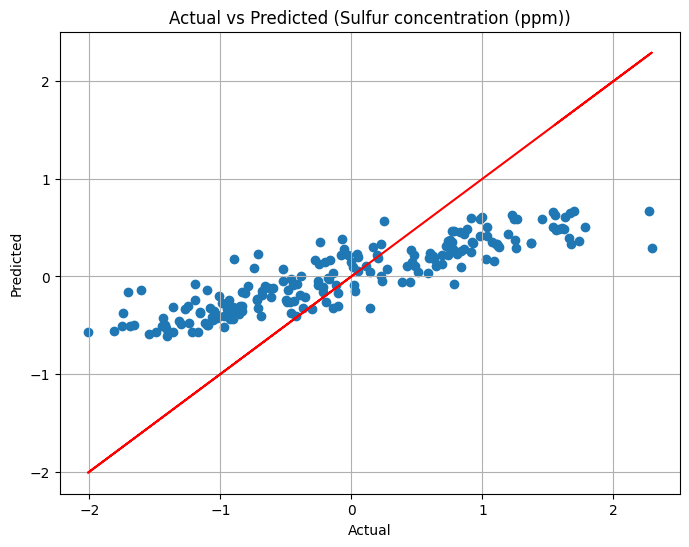

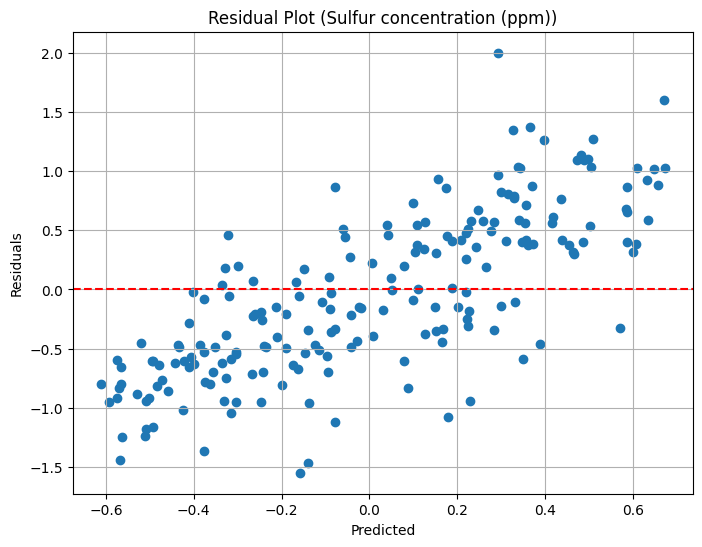

Metrics for Emission (%):
R^2: 0.6141
RMSE: 0.5976
MAE: 0.5091



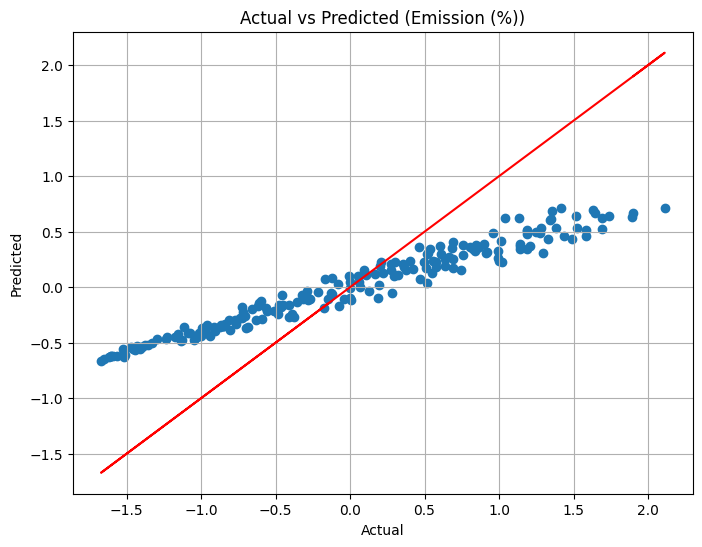

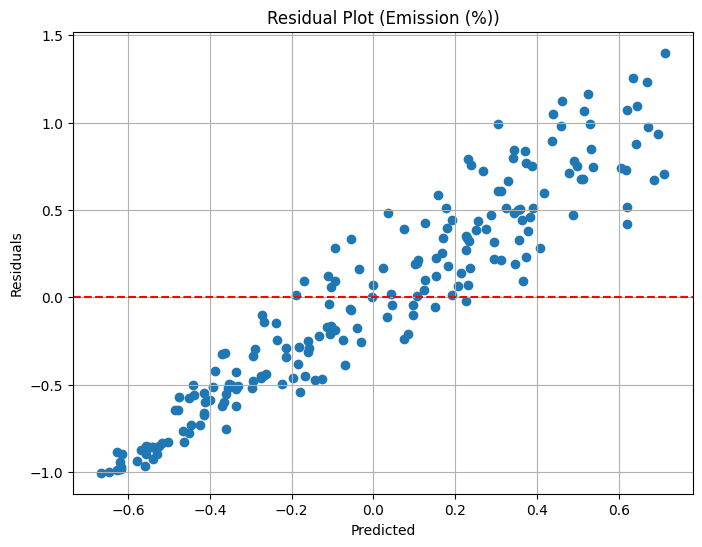

Metrics for HDS cost ($):
R^2: 0.5955
RMSE: 0.6176
MAE: 0.5272



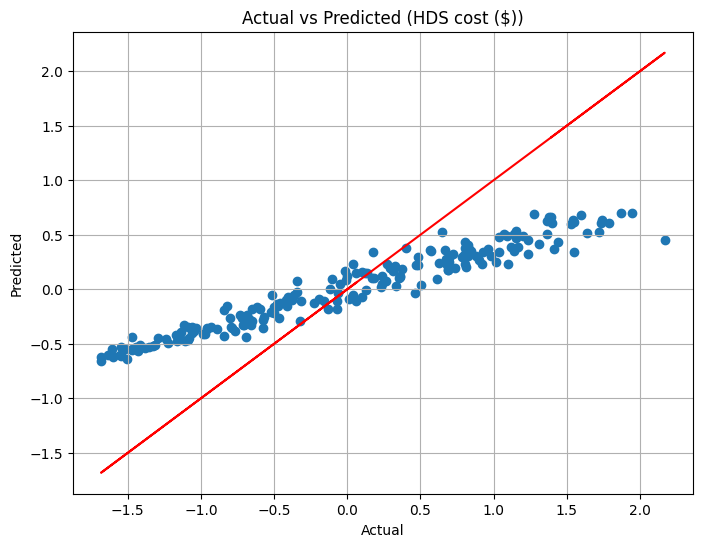

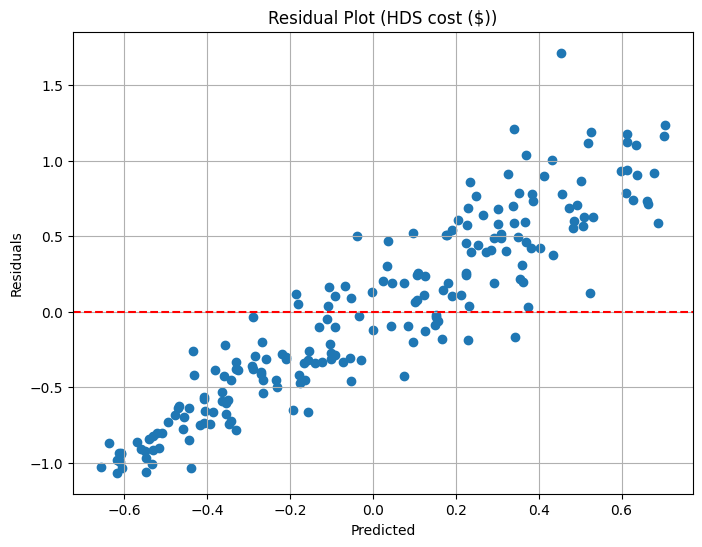

In [ ]:
#MULTI-TASK LASSO(WITHOUT HYPERPARAMETER TUNING)
from sklearn.model_selection import train_test_split
from sklearn.linear_model import MultiTaskLasso
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import numpy as np
import matplotlib.pyplot as plt

# Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(nandini_df_scaled[features], nandini_df_scaled[labels], test_size=0.2, random_state=55)

# Initialize the Multi-Task Lasso model
model = MultiTaskLasso(alpha=1.0, random_state=42)  # You can adjust the alpha parameter as needed

# Train the model
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Calculate R^2 score for each label
r2_scores = r2_score(y_test, y_pred, multioutput='raw_values')

# Calculate RMSE for each label
rmse_scores = np.sqrt(mean_squared_error(y_test, y_pred, multioutput='raw_values'))

# Calculate MAE for each label
mae_scores = mean_absolute_error(y_test, y_pred, multioutput='raw_values')

# Print performance metrics for each label
for i, label in enumerate(labels):
    print(f'Metrics for {label}:')
    print(f'R^2: {r2_scores[i]:.4f}')
    print(f'RMSE: {rmse_scores[i]:.4f}')
    print(f'MAE: {mae_scores[i]:.4f}')
    print()

    # Plot actual vs predicted values
    plt.figure(figsize=(8, 6))
    plt.scatter(y_test[label], y_pred[:, i])
    plt.plot(y_test[label], y_test[label], color='red')  # Line representing perfect predictions
    plt.title(f'Actual vs Predicted ({label})')
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.grid(True)
    plt.show()

    # Plot residual plot
    residuals = y_test[label] - y_pred[:, i]
    plt.figure(figsize=(8, 6))
    plt.scatter(y_pred[:, i], residuals)
    plt.title(f'Residual Plot ({label})')
    plt.xlabel('Predicted')
    plt.ylabel('Residuals')
    plt.axhline(y=0, color='red', linestyle='--')  # Line at y=0
    plt.grid(True)
    plt.show()

Metrics for Sulfur concentration (ppm):
R^2: 0.8001
RMSE: 0.4390
MAE: 0.3339



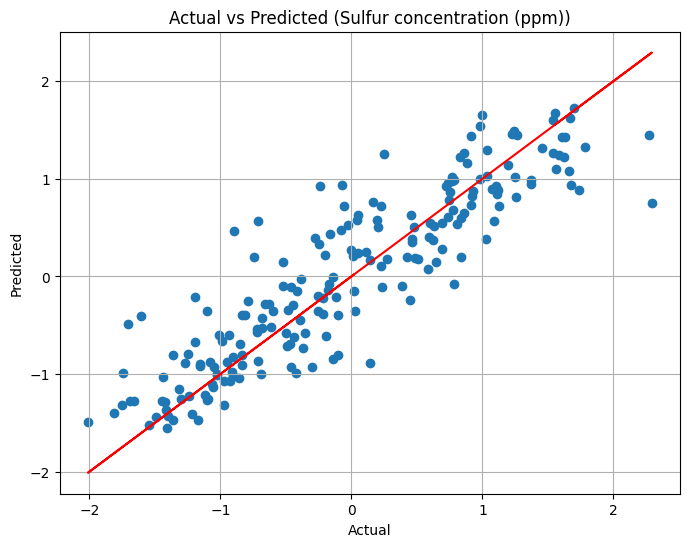

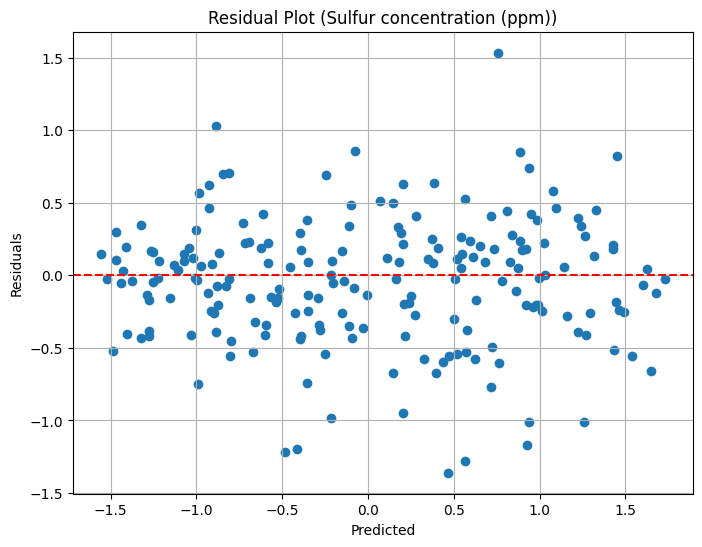

Metrics for Emission (%):
R^2: 0.9646
RMSE: 0.1809
MAE: 0.1370



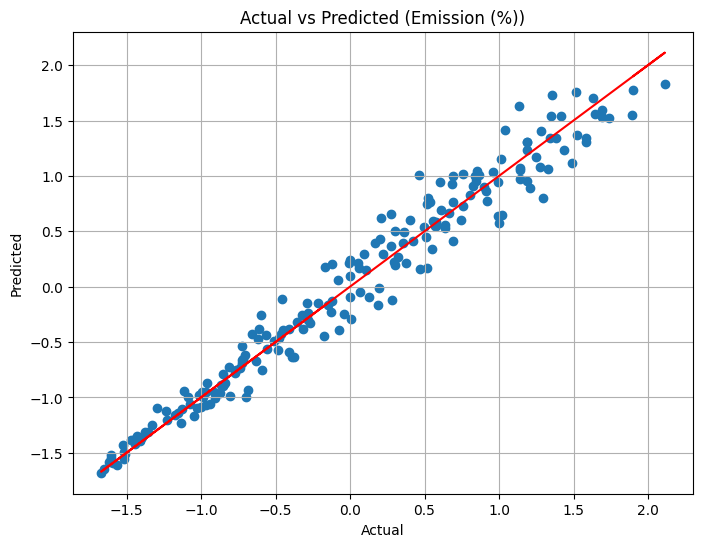

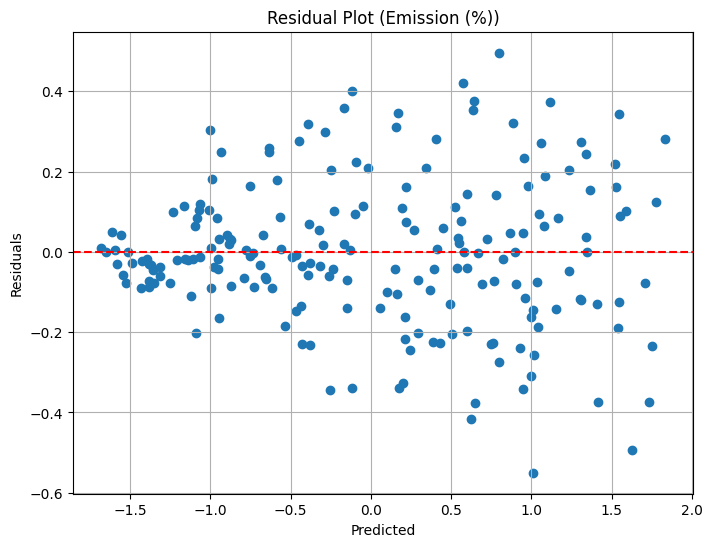

Metrics for HDS cost ($):
R^2: 0.9444
RMSE: 0.2289
MAE: 0.1730



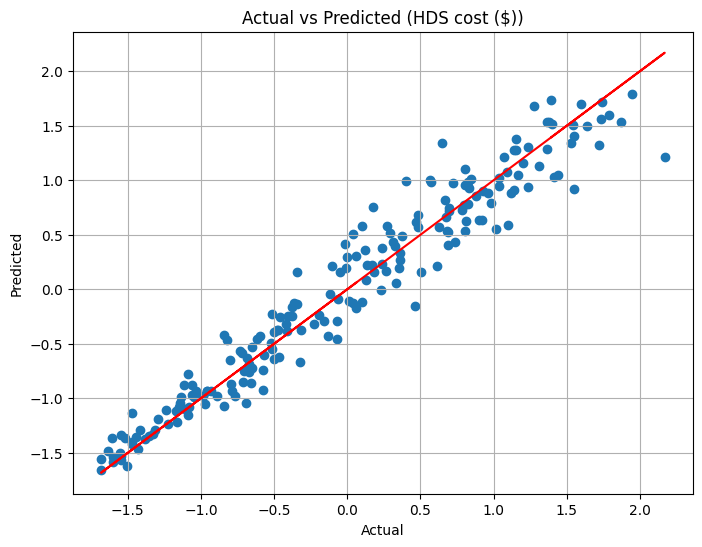

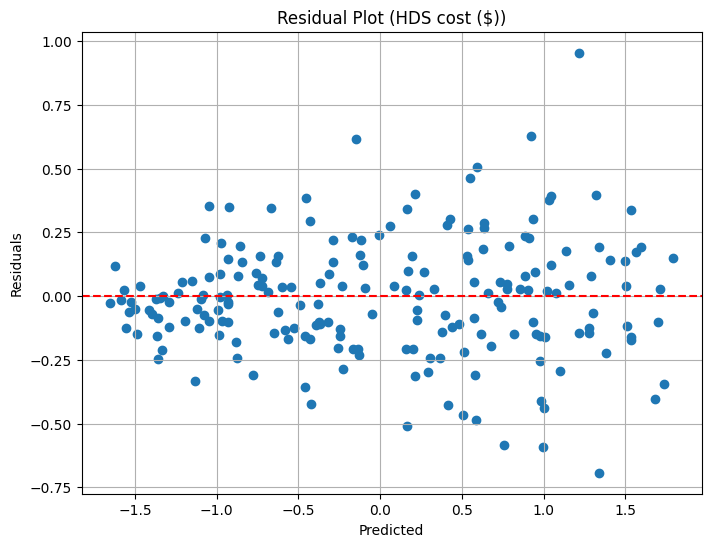

In [183]:
#MULTI-TASK LASSO(WITH HYPERPARAMETER TUNING)
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import MultiTaskLasso
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import numpy as np
import matplotlib.pyplot as plt

# Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(nandini_df_scaled[features], nandini_df_scaled[labels], test_size=0.2, random_state=55)

# Define hyperparameters for grid search
param_grid = {'alpha': [0.001, 0.01, 0.1, 1.0, 10.0]}  # Adjust alpha values as needed

# Initialize the Multi-Task Lasso model
model = MultiTaskLasso(random_state=42)

# Perform grid search
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='r2')
grid_search.fit(X_train, y_train)

# Get best estimator
best_model = grid_search.best_estimator_

# Predict on the test set
y_pred = best_model.predict(X_test)

# Calculate R^2 score for each label
r2_scores = r2_score(y_test, y_pred, multioutput='raw_values')

# Calculate RMSE for each label
rmse_scores = np.sqrt(mean_squared_error(y_test, y_pred, multioutput='raw_values'))

# Calculate MAE for each label
mae_scores = mean_absolute_error(y_test, y_pred, multioutput='raw_values')

# Print performance metrics for each label
for i, label in enumerate(labels):
    print(f'Metrics for {label}:')
    print(f'R^2: {r2_scores[i]:.4f}')
    print(f'RMSE: {rmse_scores[i]:.4f}')
    print(f'MAE: {mae_scores[i]:.4f}')
    print()

    # Plot actual vs predicted values
    plt.figure(figsize=(8, 6))
    plt.scatter(y_test[label], y_pred[:, i])
    plt.plot(y_test[label], y_test[label], color='red')  # Line representing perfect predictions
    plt.title(f'Actual vs Predicted ({label})')
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.grid(True)
    plt.show()

    # Plot residual plot
    residuals = y_test[label] - y_pred[:, i]
    plt.figure(figsize=(8, 6))
    plt.scatter(y_pred[:, i], residuals)
    plt.title(f'Residual Plot ({label})')
    plt.xlabel('Predicted')
    plt.ylabel('Residuals')
    plt.axhline(y=0, color='red', linestyle='--')  # Line at y=0
    plt.grid(True)
    plt.show()
